# Introduction
The variance scheduling determines how quickly an initial image approaches a Gaussian distribution as noise is added to it along the diffusion Markov chain. Mathematically, the higher the variance, the faster the rate at which this occurs. This problem should give you a more qualitative intuition behind this diffusion process.

# Library imports
Before you begin, make sure you have the following libraries installed.

In [1]:
import jax.numpy as jnp
from jax import random
from jax import jit

In [2]:
from jax.config import config
config.update("jax_debug_nans", True)

# Part A: Implementing the Diffusion Process
Implement the diffusion process according to the formulas specified in problem (1) of the homework, then run the cells immediately following to test your implementation.

In [3]:
@jit
def diffuse(key, x, var):
    """
    Given (flattened) x, sample x diffused with Gaussian noise
    according to the variance schedule.
    """
    # BEGIN SOLUTION
    mean = jnp.dot(jnp.sqrt(1 - var), x)
    cov = jnp.dot(var, jnp.eye(x.shape[0]))
    return random.multivariate_normal(key, mean, cov)
    # END SOLUTION

@jit
def diffuse_over_time(key, x, var_schedule):
    states = [x]
    shape = x.shape
    x = x.flatten()
    for t in jnp.arange(var_schedule.shape[0]):
        key, subkey = random.split(key)
        x = diffuse(subkey, x, var_schedule[t])
        states.append(x.reshape(shape))
    return states


## Sanity Check
The following cells will test your implementation on the identity matrix. The image should gradually fade until the final matrix is almost unrecognizable.

In [4]:
%matplotlib ipympl
import matplotlib.pyplot as plt

def show_plots(states):
    n = len(states)
    _, axs = plt.subplots(nrows=1, ncols=n, figsize=(9, 2))
    for i in range(n):
        axs[i].imshow(states[i])

def create_and_show(key, var_schedule, x):
    key = random.PRNGKey(key)
    states = diffuse_over_time(key, x, var_schedule)
    show_plots(states)
    return states

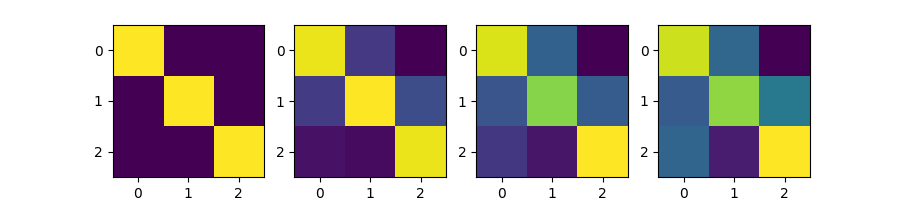

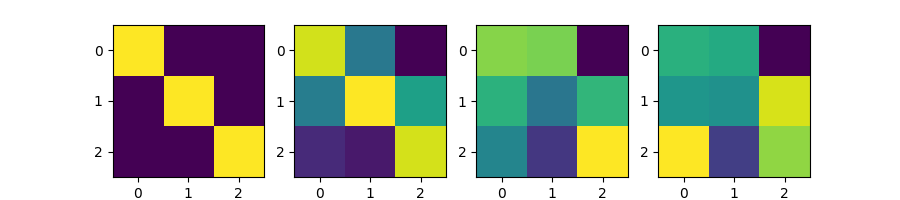

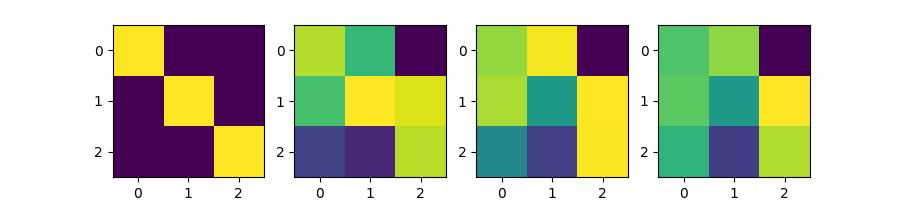

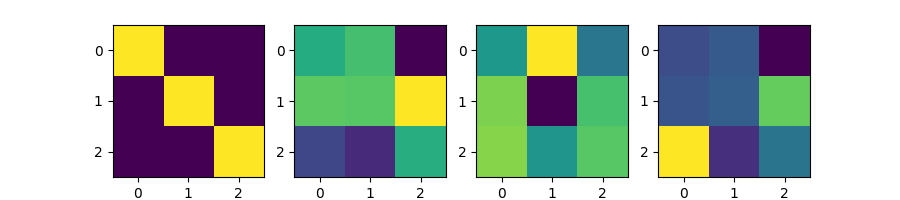

In [5]:
x = jnp.eye(3)

var_schedules = [
    jnp.array([0.01, 0.01, 0.01]),
    jnp.array([0.1, 0.2, 0.5]),
    jnp.array([0.5, 0.2, 0.1]),
    jnp.array([0.99, 0.99, 0.99]),
]

for var_schedule in var_schedules:
    create_and_show(0, var_schedule, x)

In [ ]:
# BEGIN SOLUTION
x = jnp.array([
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0]])
# END SOLUTION

var_schedules = [
    # BEGIN SOLUTION
    jnp.array([0.1, 0.99, 0.1])
    # END SOLUTION
]

for var_schedule in var_schedules:
    create_and_show(0, var_schedule, x)

# (Optional) Comparing the JIT and non-JIT versions of the diffusion process
Implement the following non-JIT version of the diffuse function.

In [7]:
# An interesting comparison in timing between
# non-JIT and JIT versions of the diffuse function

def diffuse_nojit(key, x, var):
    """
    Given (flattened) x, sample x diffused with Gaussian noise
    according to the variance schedule.
    """
    # BEGIN SOLUTION
    mean = jnp.dot(jnp.sqrt(1 - var), x)
    cov = jnp.dot(var, jnp.eye(x.shape[0]))
    return random.multivariate_normal(key, mean, cov)
    # END SOLUTION

key = random.PRNGKey(0)
x = jnp.eye(3).flatten()

print("Timing for JIT diffuse:")
%timeit diffuse(key, x, 0.01)

print("Timing for non-JIT diffuse:")
%timeit diffuse_nojit(key, x, 0.01)

Timing for JIT diffuse:
64 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Timing for non-JIT diffuse:
442 µs ± 4.25 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
